In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns 

In [29]:
df = pd.read_csv('C:/Users/ADMIN/Desktop/ML/House Price Prediction Dataset.csv')

In [30]:
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [12]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [13]:
print(df.isnull().sum())

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [14]:
df.shape

(2000, 10)

In [32]:
from sklearn.preprocessing import LableEncoder
le = LabelEncoder()
df['Garage'] = le.fit_transform(df['Garage'])

ImportError: cannot import name 'LableEncoder' from 'sklearn.preprocessing' (C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\__init__.py)

In [15]:
df = pd.get_dummies(df, columns=['Location'],drop_first=True)

In [16]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['Condition'] = encoder.fit_transform(df[['Condition']])

In [17]:
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,Price,Location_Rural,Location_Suburban,Location_Urban
0,1,1360,5,4,3,1970,0.0,False,149919,False,False,False
1,2,4272,5,4,3,1958,0.0,False,424998,False,False,False
2,3,3592,2,2,3,1938,2.0,False,266746,False,False,False
3,4,966,4,2,2,1902,1.0,True,244020,False,True,False
4,5,4926,1,4,2,1975,1.0,True,636056,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,3.0,False,295620,False,True,False
1996,1997,3046,5,2,1,2019,3.0,True,580929,False,True,False
1997,1998,1062,5,1,2,1903,3.0,False,476925,True,False,False
1998,1999,4062,3,1,2,1936,0.0,True,161119,False,False,True


In [18]:
X = df.drop(columns=['Price', 'Id'])
y = df['Price']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [23]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [24]:
print("Mean Squared Error:", mse)
print("r2 score:",r2)

Mean Squared Error: 78257905104.25493
r2 score: -0.00590081615738125


In [26]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

      Actual      Predicted
1860  514764  502104.105750
353   694256  530565.673319
1333   66375  493491.108293
905   650243  555323.674557
1289  223285  569568.975092
...      ...            ...
965   386940  553351.460037
1284  632570  545244.790732
1739  494049  516772.536931
261   562193  535834.014230
535   447530  560549.239108

[400 rows x 2 columns]


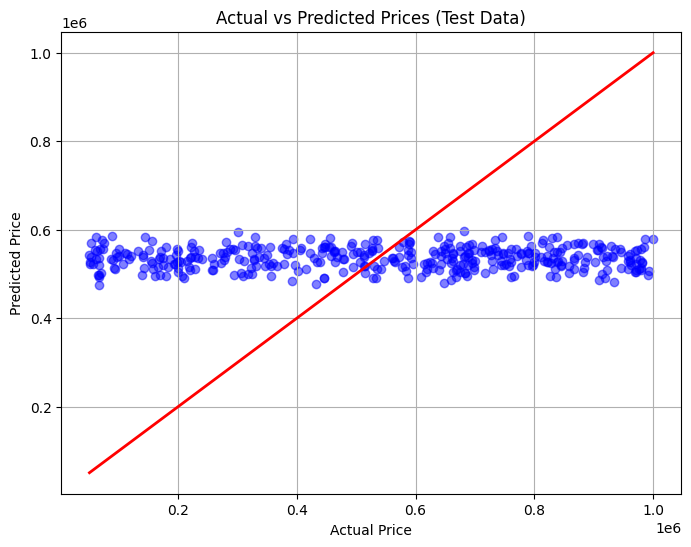

In [27]:
# Scatter plot: Actual vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Test Data)')
plt.grid(True)
plt.show()


In this project, we applied Linear Regression to predict house prices using a dataset containing various features like area, number of rooms, and more. However, the model did not perform well. The Mean Squared Error (MSE) was very high (78,257,905,104), and the R² score was close to 0 (specifically -0.0059), which means the model failed to explain the variation in house prices. The scatter plot also shows that the predicted prices are almost flat and do not follow the actual price trend. This indicates that Linear Regression may not be the best model for this dataset, possibly because the data is non-linear, contains outliers, or lacks proper feature scaling or transformation. We may need to try more advanced models like Random Forest or Gradient Boosting for better results.